**IMPORTING DEPENDENCIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import plotly.express as px
import pandas as pd
import ast
import math
import random
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pickle

**DATA OVERVIEW**

In [ ]:
# Loading the dataset
df = pd.read_csv('Rossman_data.csv')
df.head()

<ipython-input-48-f6bea11e154e>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Rossman_data.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# Checking Dataset datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


**DATA CLEANING**

In [ ]:
df['StateHoliday'].value_counts()

StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [ ]:
print(df['StateHoliday'].unique())

['0' 'a' 'b' 'c' 0]


In [ ]:
# Checking for missing value
df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
print(df['StateHoliday'].nunique())

5


In [ ]:
df['Date'].unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

In [ ]:
# Changing the "StateHoliday" datatype (object) to integer
df.loc[df['StateHoliday'] == '0', 'StateHoliday'] = 0
df.loc[df['StateHoliday'] == 'a', 'StateHoliday'] = 1
df.loc[df['StateHoliday'] == 'b', 'StateHoliday'] = 2
df.loc[df['StateHoliday'] == 'c', 'StateHoliday'] = 3

# Store the value with the same column name "StateHoliday"
df['StateHoliday'] = df['StateHoliday'].astype(int, copy=False)

In [ ]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
print(df['StateHoliday'].nunique())


4


In [ ]:
print(df['StateHoliday'].unique())

[0 1 2 3]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  int64 
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 69.8+ MB


In [ ]:
# Chaning format of date from object to DateTime
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  int64         
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 69.8 MB


**UNDERSTANDING MY FEATURES**

In [ ]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
df.describe().round(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1017209.00,1017209.0,1017209,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.0,2014-04-11 01:30:42.846061824,5773.82,633.15,0.83,0.38,0.05,0.18
min,1.00,1.0,2013-01-01 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00
25%,280.00,2.0,2013-08-17 00:00:00,3727.00,405.00,1.00,0.00,0.00,0.00
50%,558.00,4.0,2014-04-02 00:00:00,5744.00,609.00,1.00,0.00,0.00,0.00
75%,838.00,6.0,2014-12-12 00:00:00,7856.00,837.00,1.00,1.00,0.00,0.00
max,1115.00,7.0,2015-07-31 00:00:00,41551.00,7388.00,1.00,1.00,3.00,1.00
std,321.91,2.0,NaN,3849.93,464.41,0.38,0.49,0.28,0.38


**VISUALISATION**

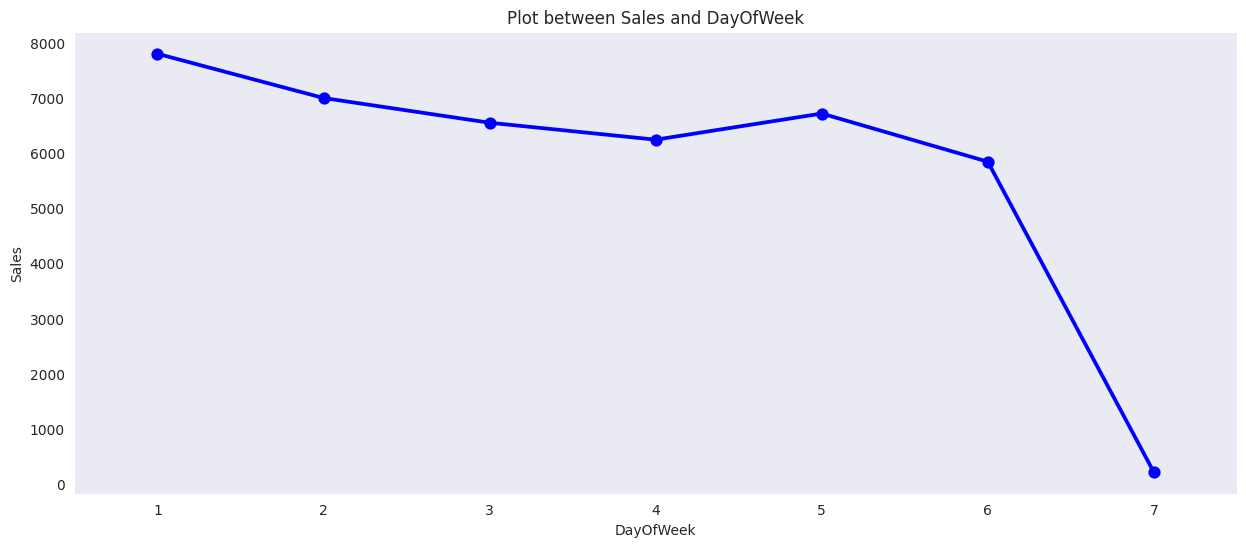

In [ ]:
# Creating a point plot that shows sales against DayOfWeek
plt.figure(figsize=(15,6))
sns.set_style("dark")  # Set style before plotting
sns.pointplot(x='DayOfWeek', y='Sales', data=df, color='Blue')
plt.title('Plot between Sales and DayOfWeek')
plt.show()

Text(0.5, 1.0, 'Store Daily Open countplot')

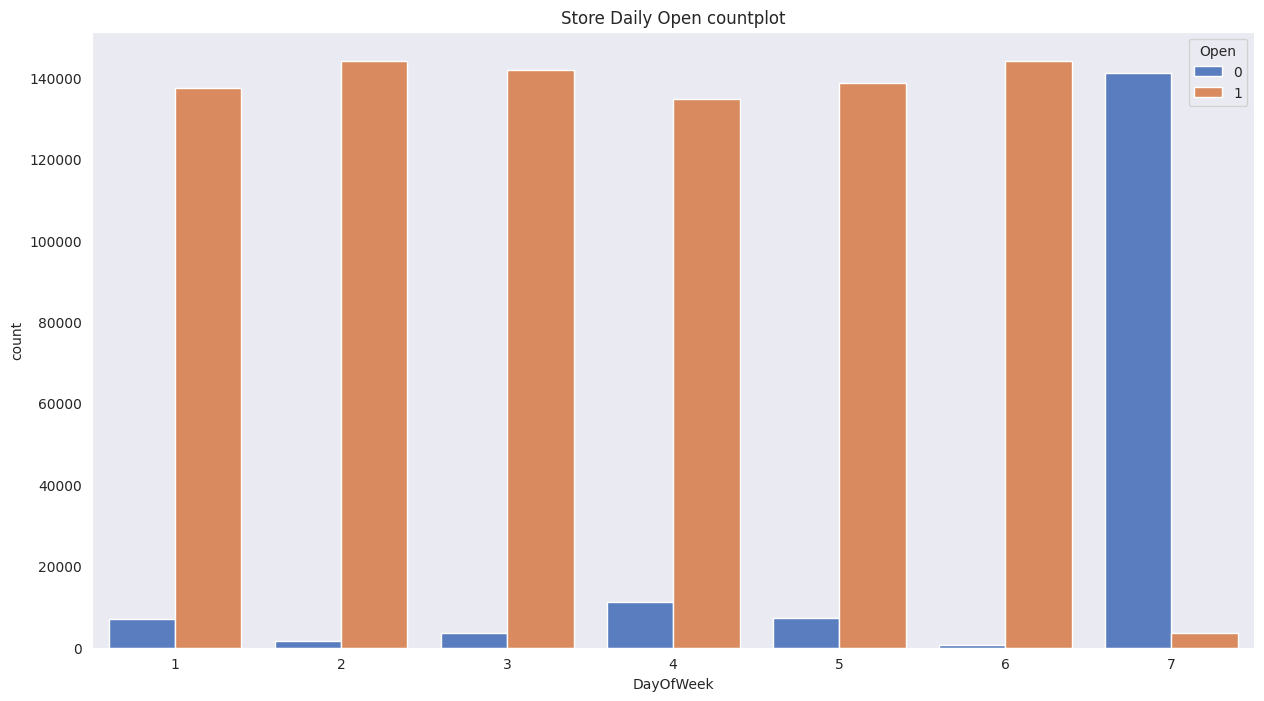

In [ ]:
# Creating a countplot to visualise the distribution of store openings per day,
# with 'Open' status differentiated by hue
plt.figure(figsize=(15, 8))
sns.countplot(x = 'DayOfWeek', hue = 'Open', data = df, palette = 'muted')
plt.title('Store Daily Open countplot')

Text(0.5, 1.0, 'Store Daily Promo Countplot')

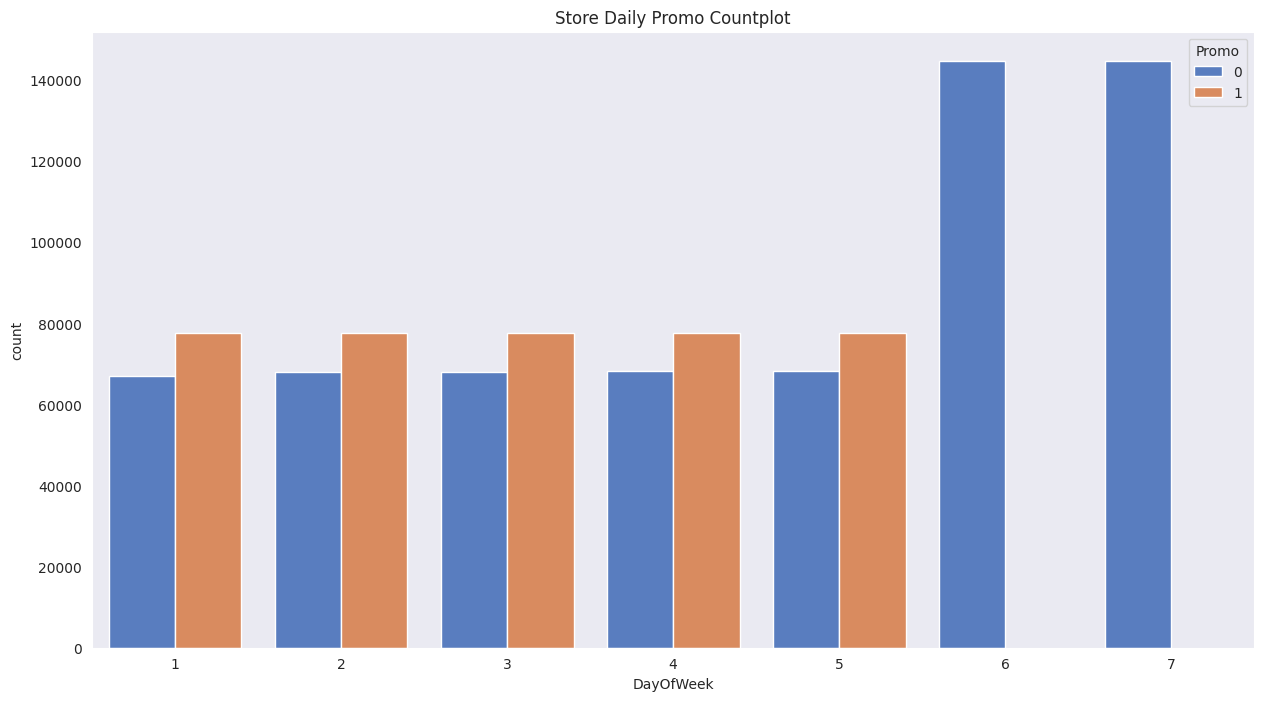

In [ ]:
# Creating a countplot to visualise the distribution of promotional activities per day,
# with 'Promo' status differentiated by hue.
plt.figure(figsize=(15,8))
sns.countplot(x='DayOfWeek', hue='Promo', data=df, palette='muted')
plt.title('Store Daily Promo Countplot')

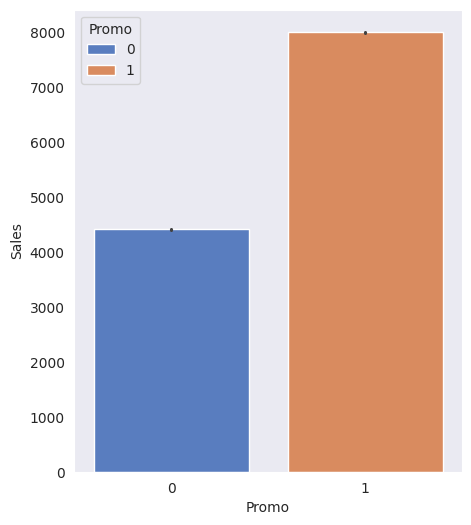

In [ ]:
# Creating a bar plot to compare sales with and without promotions
# With "Promo" Status Differentiated by hue.
plt.figure(figsize=(5,6))
promo_sales = sns.barplot(x="Promo", y="Sales", data=df, hue='Promo', palette="muted", dodge=False)

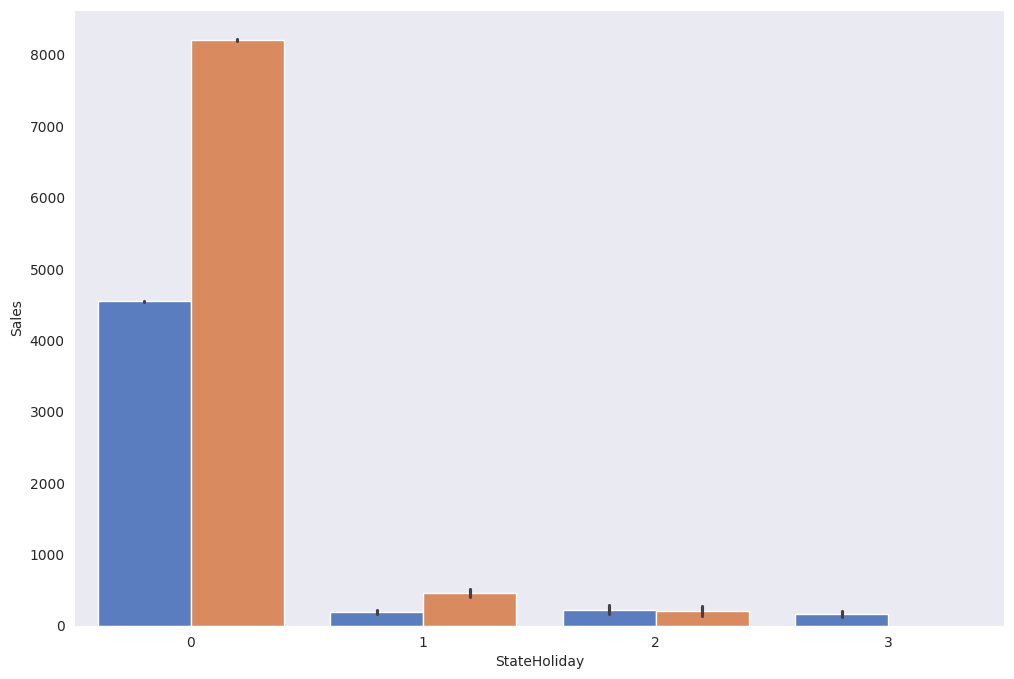

In [ ]:
# Creating a bar plot to compare sales with respect to state holidays
# With "Promo" Status Differentiated by hue.
plt.figure(figsize=(12,8))
stateholiday_sales = sns.barplot(x='StateHoliday', y='Sales', data=df, hue='Promo', palette='muted', legend=False)

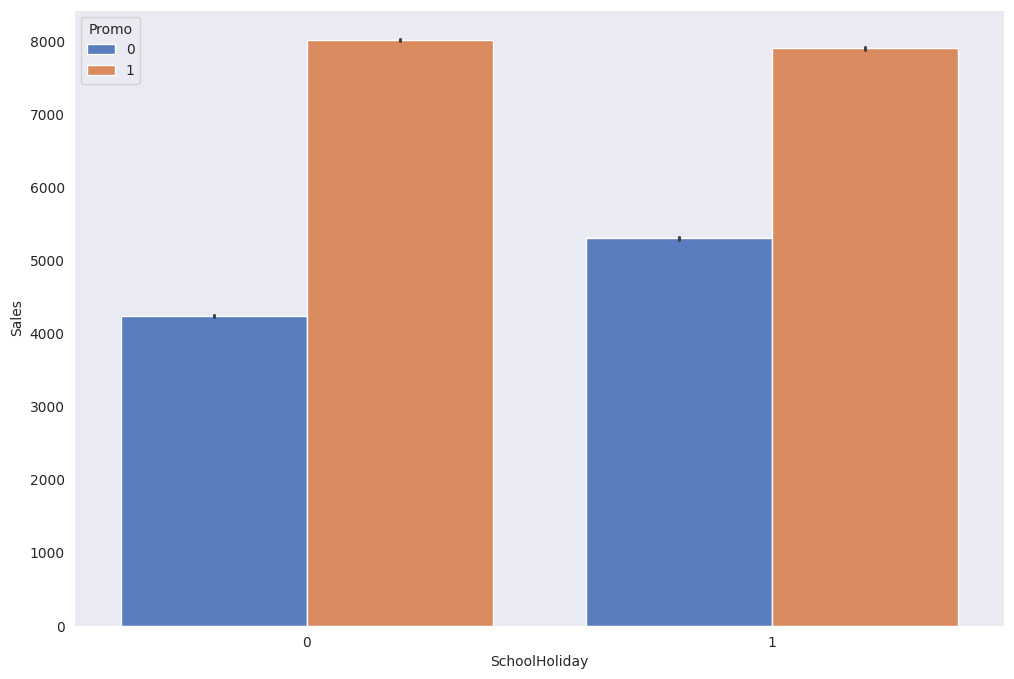

In [ ]:
# Creating a bar plot to compare sales with respect to Schoool holidays
# With "Promo" Status Differentiated by hue.
plt.figure(figsize=(12,8))
stateholiday_sales = sns.barplot(x='SchoolHoliday', y='Sales', data=df, hue='Promo',palette='muted')

***FEATURE ENGINEERING ***



<Axes: >

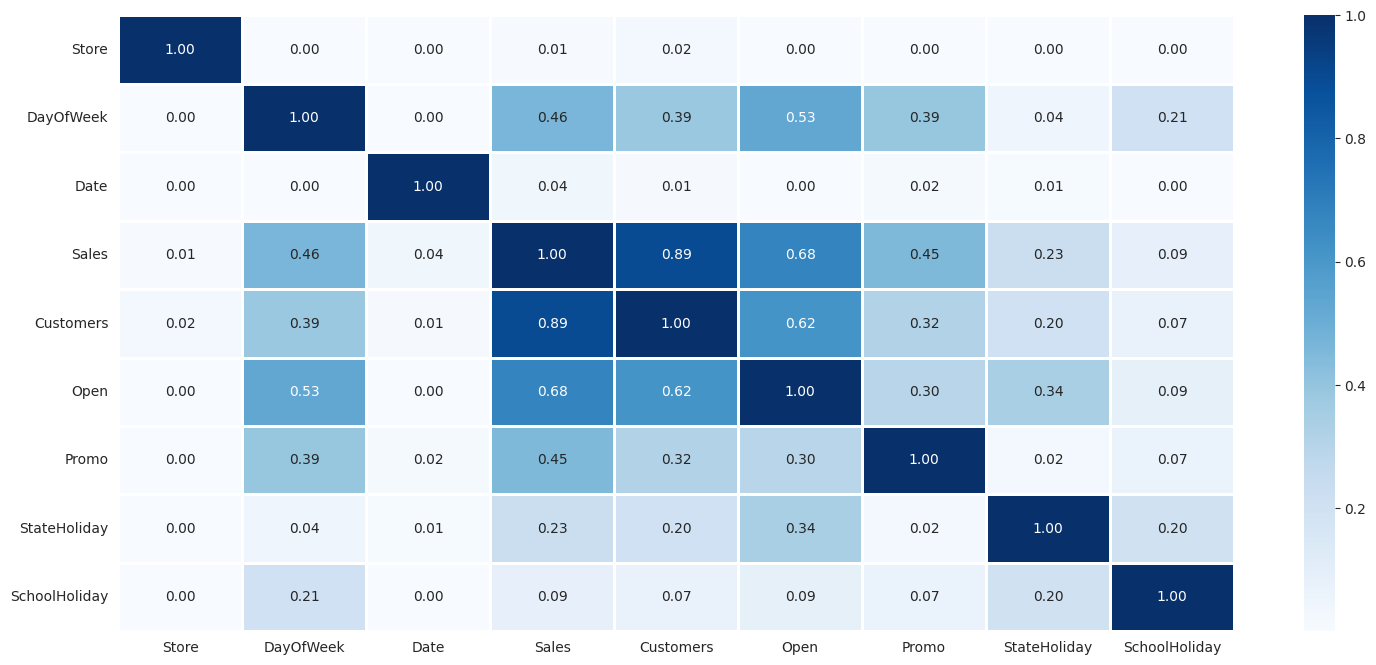

In [ ]:
# creates a heatmap to visualise the absolute correlation matrix of the DataFrame df.
plt.figure(figsize=(18,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='Blues', linewidths=2, fmt='.2f')

The color of the cell indicates the direction and strength of the correlation: a positive correlation is indicated by a warm color (such as BLUE) and a negative correlation is indicated by a cool color (such as Orange).The intensity of the color represents the strength of the correlation.

**MULTICOLLINEARITY**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
df.describe()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,2014-04-11 01:30:42.846061824,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,4.516279e-02,1.786467e-01
min,1.000000e+00,1.000000e+00,2013-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,2013-08-17 00:00:00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,2014-04-02 00:00:00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,2014-12-12 00:00:00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,2015-07-31 00:00:00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,2.836559e-01,3.830564e-01


In [ ]:
# Check the data types of each column
print(df.dtypes)

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday              int64
SchoolHoliday             int64
dtype: object


In [ ]:
# Convert non-numeric columns to numeric types
df = df.apply(pd.to_numeric, errors='coerce')

In [ ]:
# Check the data types of each column
print(df.dtypes)

Store            int64
DayOfWeek        int64
Date             int64
Sales            int64
Customers        int64
Open             int64
Promo            int64
StateHoliday     int64
SchoolHoliday    int64
dtype: object


In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,9.991836e-01
1,DayOfWeek,9.988598e-01
2,Date,-7.532318e-23
3,Customers,1.000051e+00
4,Open,9.985833e-01
5,Promo,1.000282e+00
6,StateHoliday,1.000037e+00
7,SchoolHoliday,9.999543e-01


**MODEL TRAINING**

In [ ]:
# defining dependent variable
dependent_variables = 'Sales'

# defining independent variable
independent_variables = list(df.columns.drop(['Promo','Date','Sales']))

In [ ]:
#List of Independent Variable
independent_variables

['Store', 'DayOfWeek', 'Customers', 'Open', 'StateHoliday', 'SchoolHoliday']

In [ ]:
#Creating a data for independent variables
X = df[independent_variables].values

#Creating a data of dependent variables
y = df[dependent_variables].values

In [ ]:
# Spliting the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 20)

print(X_train.shape)
print(y_train.shape)

(813767, 6)
(813767,)


In [ ]:
# Here we Train the model
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
#Checking the Regression Score i.e R-squared value
reg.score(X_train, y_train)

0.8318813230997502

In [ ]:
# Checking the cofficient of different independent columns
reg.coef_

array([-1.55302523e-01, -1.66971709e+02,  6.31244345e+00,  1.57792142e+03,
       -3.49117103e+02,  4.62008130e+01])

In [ ]:
#checking the intercept of different indpendent columns
reg.intercept_

1229.9174134129535

In [ ]:
#Predicting Dependent Variable With Test Dataset i.e 20%
y_pred = reg.predict(X_test)
y_pred

array([8178.83375238, 5089.7120186 ,  -36.72513702, ..., 4379.03397025,
       6566.06682128, 5782.92914253])

In [ ]:
# Original Test Dependent Value
y_test

array([9367, 4458,    0, ..., 4177, 4357, 7568])

In [ ]:
#Predicting on Train Dataset
y_pred_train = reg.predict(X_train)
y_pred_train


array([ -89.37269216,   11.88455253, 6449.10737149, ..., -109.09611252,
          8.15729199, 4142.37959424])

In [ ]:
# Dependent Variable With Train Dataset i.e 80 %
y_train

array([   0,    0, 4846, ...,    0,    0, 2750])

In [ ]:
#Calculate MSE & RMSE for Test Prediction
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 2508944.0455289916
RMSE : 1583.9646604419531


In [ ]:
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)

R2 : 0.8306463583898548


In [ ]:
pd.DataFrame(zip(y_test, y_pred), columns = ['actual', 'pred'])

,actual,pred
0,9367,8178.833752
1,4458,5089.712019
2,0,-36.725137
3,8626,9066.769675
4,0,-35.948624
...,...,...
203437,5089,6455.109210
203438,5804,5262.766475
203439,4177,4379.033970
203440,4357,6566.066821


DECISION TRESS

In [ ]:
sales_mean=df[dependent_variables].mean()

In [ ]:
sales_mean

5773.818972305593

In [ ]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
y_train_dt = decision_tree.predict(X_train)
#print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE  = mean_squared_error(y_test, y_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)


RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(y_test, y_pred_dt)
print("R2 :" ,r2)

MSE : 2326363.7812496587
RMSE : 1525.2422041268262
RMPSE : 0.2641652278055002
R2 : 0.8429705203004997


In [ ]:
pd.DataFrame(zip(y_test, y_pred_dt), columns = ['actual', 'pred'])

,actual,pred
0,9367,9081.197550
1,4458,5193.516549
2,0,0.000000
3,8626,10254.692224
4,0,0.000000
...,...,...
203437,5089,6783.687569
203438,5804,5713.831942
203439,4177,4672.937452
203440,4357,6783.687569


**NEW MODEL**

In [ ]:
# defining dependent variable
dep_var = 'Sales'

# defining independent variable
indep_var = df.columns.drop(['Store', 'Promo','Date','Sales'])

In [ ]:
indep_var

Index(['DayOfWeek', 'Customers', 'Open', 'StateHoliday', 'SchoolHoliday'], dtype='object')

In [ ]:
# Create the data of independent variables
U = df[indep_var].values
# Create the dependent variable data
V = df[dep_var].values

In [ ]:
V

array([5263, 6064, 8314, ...,    0,    0,    0])

In [ ]:
U

array([[  5, 555,   1,   0,   1],
       [  5, 625,   1,   0,   1],
       [  5, 821,   1,   0,   1],
       ...,
       [  2,   0,   0,   1,   1],
       [  2,   0,   0,   1,   1],
       [  2,   0,   0,   1,   1]])

In [ ]:
df[indep_var]

,DayOfWeek,Customers,Open,StateHoliday,SchoolHoliday
0,5,555,1,0,1
1,5,625,1,0,1
2,5,821,1,0,1
3,5,1498,1,0,1
4,5,559,1,0,1
...,...,...,...,...,...
1017204,2,0,0,1,1
1017205,2,0,0,1,1
1017206,2,0,0,1,1
1017207,2,0,0,1,1


In [ ]:
# splitting the dataset
U_train, U_test, v_train, v_test = train_test_split(U, V, test_size=0.2, random_state = 0)
print(U_train.shape)
print(U_test.shape)

(813767, 5)
(203442, 5)


**LINEAR REGRESSION**

In [ ]:
# scling the x values
scaler=StandardScaler()

U_train = scaler.fit_transform(U_train)
U_test = scaler.transform(U_test)

In [ ]:
# fitting the data into Linear Regression Model
linear_regression = LinearRegression()
linear_regression.fit(U_train, v_train)

LinearRegression()

In [ ]:
v_pred=linear_regression.predict(U_test)
v_pred

array([ 7908.11798881, 12073.88478962,  9537.46611007, ...,
        6757.48954016,  7502.87408925,  3232.12842116])

In [ ]:
linear_regression.score(U_train, v_train)

0.8314492391541292

In [ ]:
regression_Dataframe = pd.DataFrame(zip(v_test, v_pred), columns = ['actual', 'pred'])
regression_Dataframe


,actual,pred
0,7285,7908.117989
1,6221,12073.884790
2,8132,9537.466110
3,20916,9720.138459
4,5472,6381.643812
...,...,...
203437,5650,6126.235456
203438,5464,6147.229658
203439,6191,6757.489540
203440,5663,7502.874089


In [ ]:
MSE  = mean_squared_error(v_test, v_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred)
print("R2 :" ,r2)

MSE : 2490120.3632804127
RMSE : 1578.0115219099043
RMPSE : 0.27330464108398866
R2 : 0.8314837394533494


**DECISION TREE**

In [ ]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(U_train, v_train)
v_pred_dt = decision_tree.predict(U_test)
v_train_dt = decision_tree.predict(U_train)
#print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE  = mean_squared_error(v_test, v_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred_dt)
print("R2 :" ,r2)

MSE : 2319380.380220018
RMSE : 1522.9512074324698
RMPSE : 0.2637684372747709
R2 : 0.8430383871303927


In [ ]:
decisiontree_Dataframe = pd.DataFrame(zip(v_test, v_pred_dt), columns = ['actual', 'pred'])
decisiontree_Dataframe

,actual,pred
0,7285,7917.337414
1,6221,11035.198912
2,8132,10362.972444
3,20916,10362.972444
4,5472,5712.825233
...,...,...
203437,5650,6233.509956
203438,5464,5712.825233
203439,6191,6768.401101
203440,5663,7306.466459


In [ ]:


# Create a random forest regressor with n_estimators=500, max_depth=8, and n_jobs=2
random_forest = RandomForestRegressor(n_estimators=500, max_depth=8, n_jobs=2)

# Fit the random forest to the training data
random_forest.fit(U_train, v_train)

# Make predictions on the test data
v_pred_rf = random_forest.predict(U_test)

# Calculate the mean squared error (MSE) between the predicted and actual values
MSE = mean_squared_error(v_test, v_pred_rf)
print("MSE:", MSE)

# Calculate the root mean squared error (RMSE)
RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)

# Calculate the root mean squared percentage error (RMPSE)
sales_mean = np.mean(v_test)
RMPSE = RMSE / sales_mean
print("RMPSE:", RMPSE)

# Calculate the coefficient of determination (R2 score)
r2 = r2_score(v_test, v_pred_rf)
print("R2:", r2)

MSE: 2175666.618809328
RMSE: 1475.014108003489
RMPSE: 0.25525350802166935
R2: 0.8527640638563638
